In [1]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
print("Feature shape:", digits.data.shape)  # Each image is flattened into a 64-length array
print("Target shape:", digits.target.shape)

Feature shape: (1797, 64)
Target shape: (1797,)


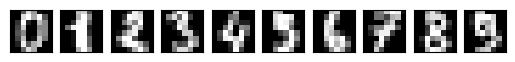

In [4]:
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(1, 10, index + 1,xticks=[], yticks=[])
    plt.imshow(image, cmap='gray')

plt.show()


In [5]:
X = digits.data  # Flattened pixel values
y = digits.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

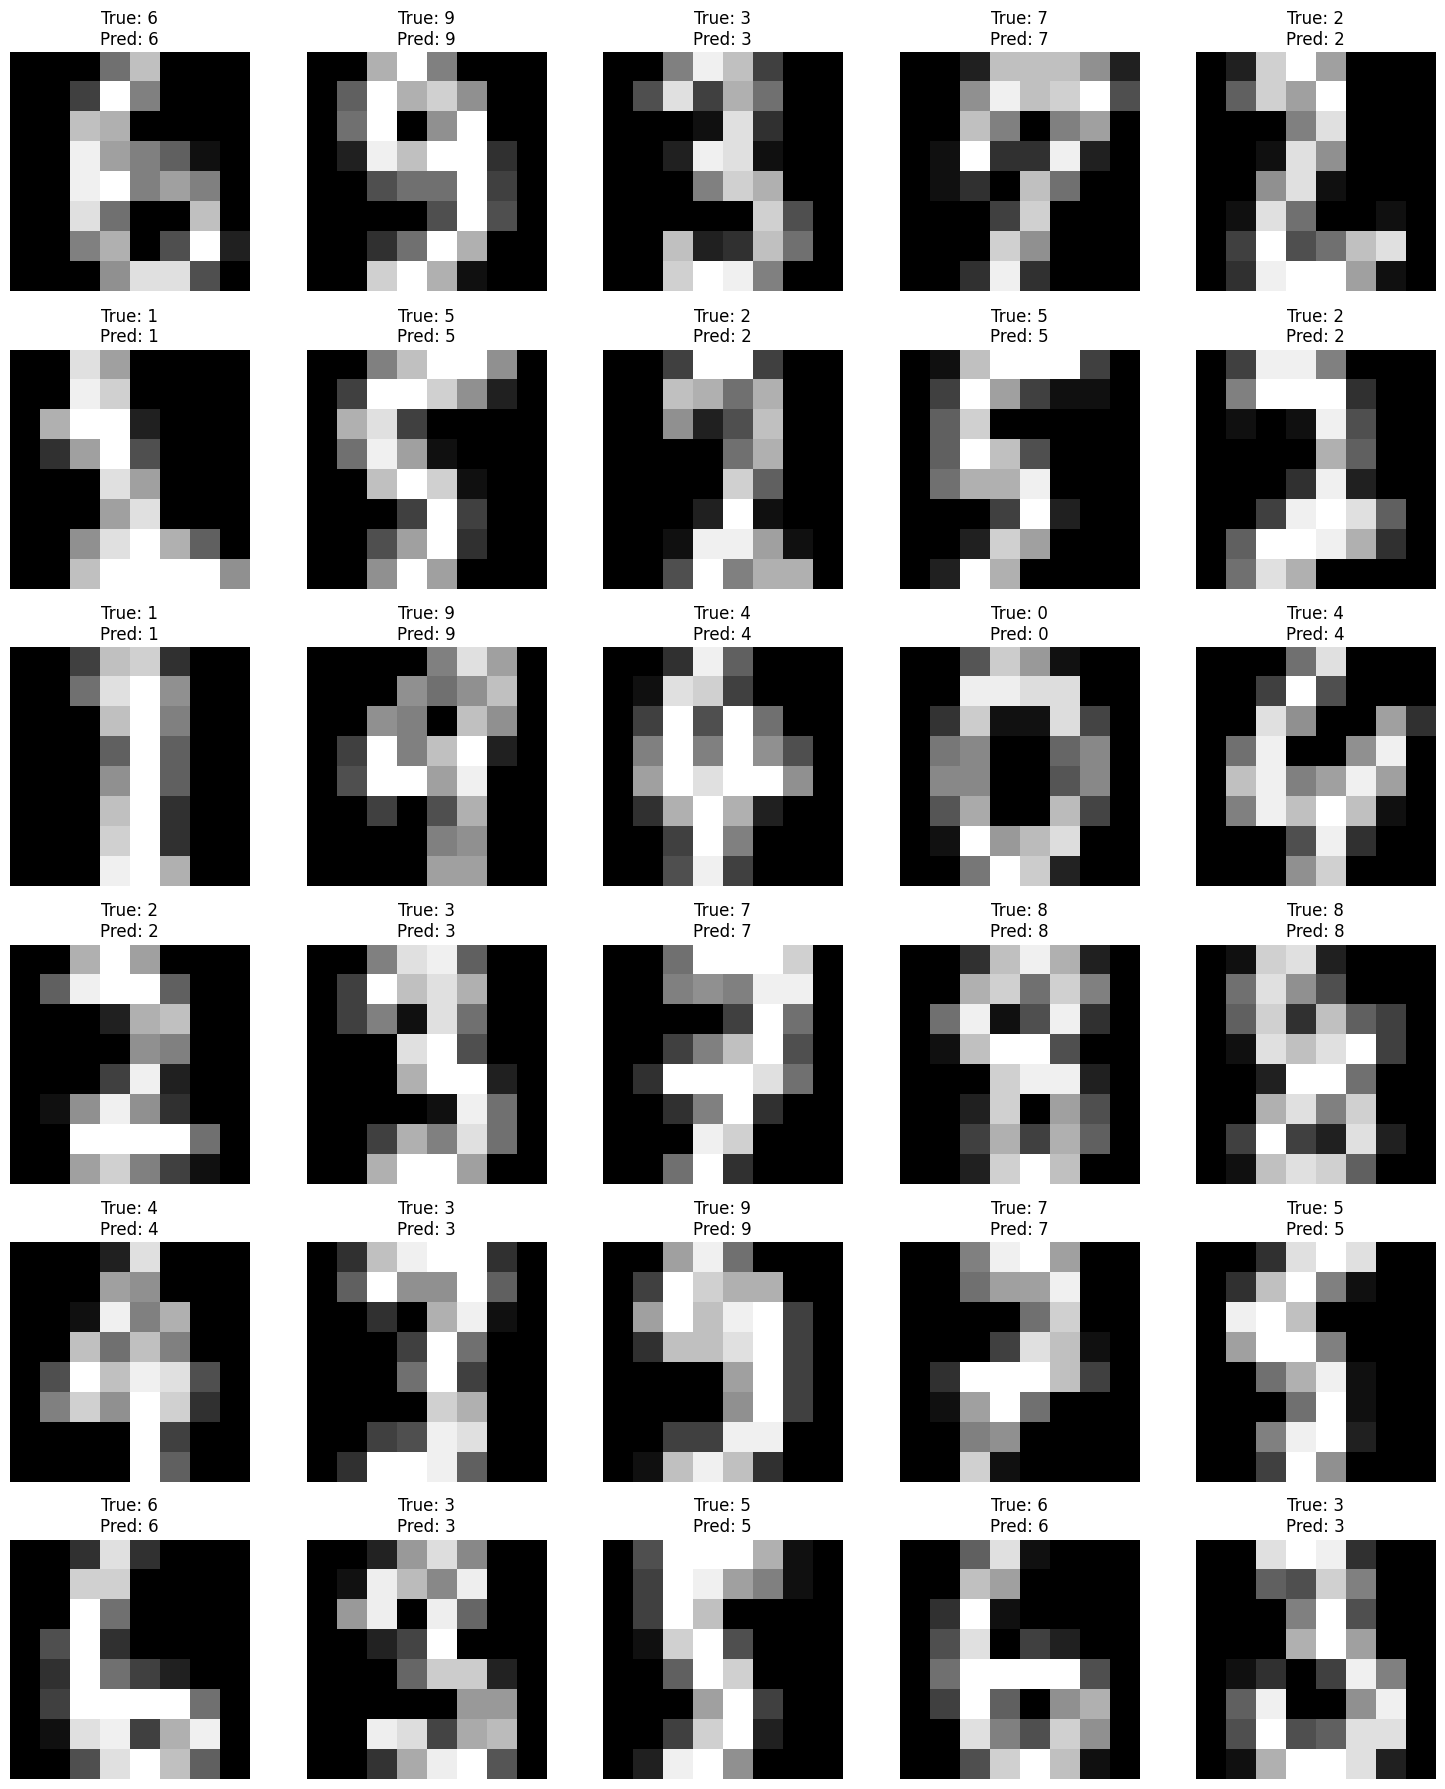

In [9]:
num_images_to_plot = 30  # Total number of images to display
images_per_row = 5  # Number of images per row

# Calculate number of rows needed
num_rows = (num_images_to_plot + images_per_row - 1) // images_per_row

# Create the plot
plt.figure(figsize=(15, 3 * num_rows))  # Adjust figure size (width, height)

for index in range(num_images_to_plot):
    plt.subplot(num_rows, images_per_row, index + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')  # Reshape to 8x8 image
    plt.title(f"True: {y_test[index]}\nPred: {y_pred[index]}")
    plt.axis('off')  # Turn off axis for better visibility

plt.tight_layout()
plt.show()

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9722222222222222


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Predicted Digit: 9


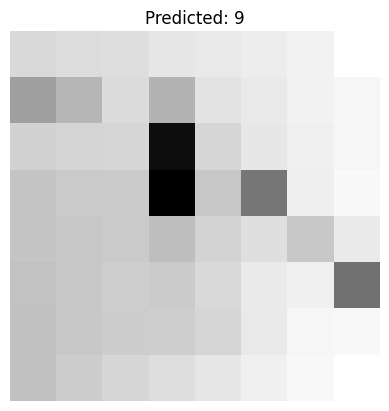

In [16]:
import cv2
import numpy as np

# Function to preprocess and predict the handwritten digit
def predict_digit(image_path, model):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print("Error: Image not found!")
        return

    # Resize to 8x8 pixels (same as the digits dataset)
    img_resized = cv2.resize(img, (8, 8))

    # Normalize pixel values (digits dataset uses values between 0 and 16)
    img_normalized = np.clip((img_resized / 255.0) * 16, 0, 16)

    # Flatten the image to a 1D array (64 features)
    img_flattened = img_normalized.flatten()

    # Reshape for prediction (1 sample, 64 features)
    img_reshaped = img_flattened.reshape(1, -1)

    # Predict the digit
    prediction = model.predict(img_reshaped)
    print(f"Predicted Digit: {prediction[0]}")

    # Display the image
    import matplotlib.pyplot as plt
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicted: {prediction[0]}")
    plt.axis('off')
    plt.show()

# Provide the path to your image
image_path = "/content/WhatsApp Image 2024-12-29 at 6.32.47 PM.jpeg"  # Replace with your image path

# Predict the digit using the trained model
predict_digit(image_path, clf)
